# 1. Introduction

The [Nobel Prize](https://www.nobelprize.org/) is one of the world's most well known awards. Aside from the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

The first Nobel Prize was handed out in 1901. At the time the Prize was very Eurocentric and given out mostly to men. How has this trend changed, if at all? That's what I'm trying to find out.

In [1]:
#required modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Reading the data
nobel = pd.read_csv("../input/archive.csv")

# The first few winners
nobel.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


Looking at the first few laureates, we can see that most of them were from Europe, and all of them were men. How does the entirety of Nobel data compare to this observation?

In [2]:
print("Total (some shared) prizes:",len(nobel))
print("\nPrizes by gender and country:")
display(nobel['Sex'].value_counts())
display(nobel['Birth Country'].value_counts().head(10))

Total (some shared) prizes: 969

Prizes by gender and country:


Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

# 2. Dominance of the USA

Clearly, men maintain a strong dominance in the space of Nobel Prizes. Also, the typical Nobel Prize winner seems to be a man from the United States of America. However, as we saw earlier, in 1901 all awardees were from Europe. When did the USA begin its significant dominance in the charts? Let's find out.

Proportion of winners born in the USA, per decade:


,Decade,USA-born Winners
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


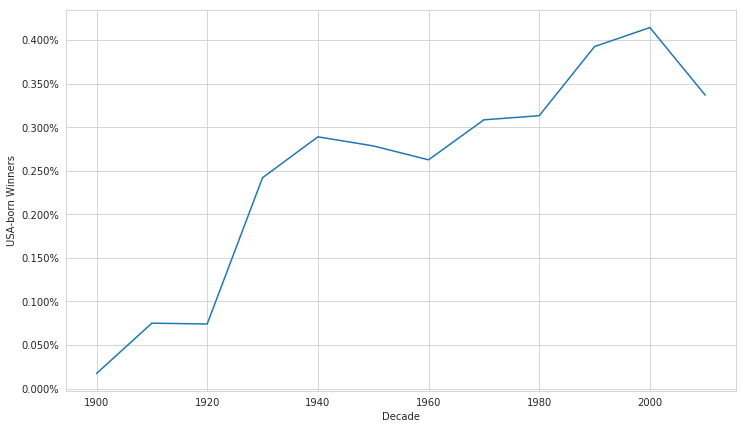

In [3]:
# Proportion of US-born winners per decade
nobel['USA-born Winners'] = nobel['Birth Country'] == 'United States of America'
nobel['Decade'] = (np.floor(nobel['Year'] / 10) * 10).astype('int64')
prop_usa_winners = nobel[['USA-born Winners', 'Decade']].groupby('Decade', as_index = False).mean()

print("Proportion of winners born in the USA, per decade:")
display(prop_usa_winners)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 7]
ax = sns.lineplot(x = "Decade", y = "USA-born Winners", data = prop_usa_winners)
ax.yaxis.set_major_formatter(PercentFormatter())

It seems that the United States started its dominance in the 1930s, and has since not let go. While their proportion has somewhat dropped in the last decade, they still maintain their lead.

# 3. Gender Differences

Let us now look at the other dominant group - men, and how the disparity of winners between men and women varies with different disciplines of the prize.

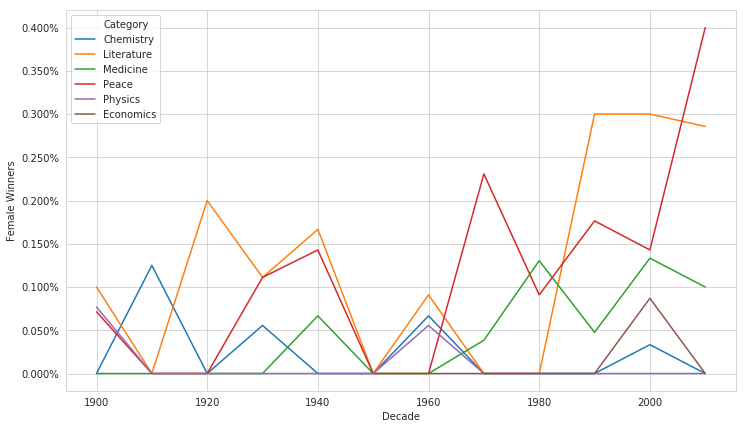

In [4]:
# Proportion of female laureates per decade
nobel['Female Winners'] = nobel['Sex'] == 'Female'
prop_female_winners = nobel[['Female Winners', 'Decade', 'Category']].groupby(['Decade', 'Category'], as_index = False).mean()

ax = sns.lineplot(x = "Decade", y = "Female Winners", hue = "Category", data = prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter())

The above somewhat messy plot from overplotting lines shows that the imbalance is very large, with Physics, Economics and Chemistry faring the worst. Medicine has been doing better since the 1960s, and literature has also picked up. Peace, however, has the largest proportion of women by far in the last decade. Let us have a look at the first ever female Nobel Prize winner.

In [5]:
nobel[nobel['Sex'] == "Female"].nsmallest(1, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,USA-born Winners,Decade,Female Winners
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# 4. Ages of the laureates

Let us now look at the last of the major factors - age. First, I will show you the ages of all laureates combined. We will see what we can glean from a plot of that, and then we will move onto looking at the ages by category.

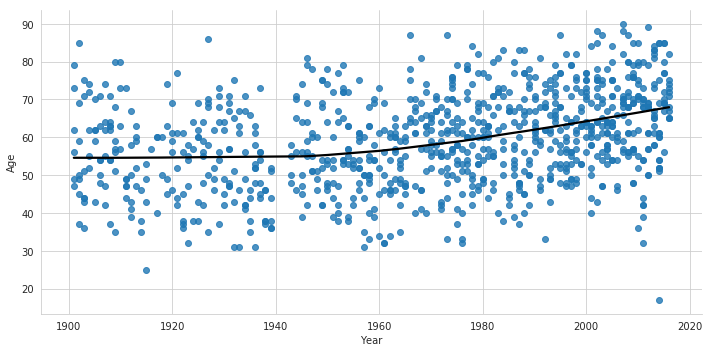

In [6]:
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], errors = 'coerce')
nobel['Age'] = nobel['Year'] - nobel['Birth Date'].dt.year

ax = sns.lmplot(x = 'Year', y = 'Age', data = nobel, lowess = True, aspect = 2, line_kws = {'color' : 'black'})

The above plot is very informative. It tells us that in 1901 the average age of a laureate was 55 years, whereas now it is over 65. We also see that there is a larger spread in the ages of laureates now, and that there are many more laureates now (most likely because more prizes now are shared, and also from the introduction of the Economics prize). Finally, notice that there was a disruption in the awards during the Second World War.

Lastly, let us look at the ages of the winners by category.

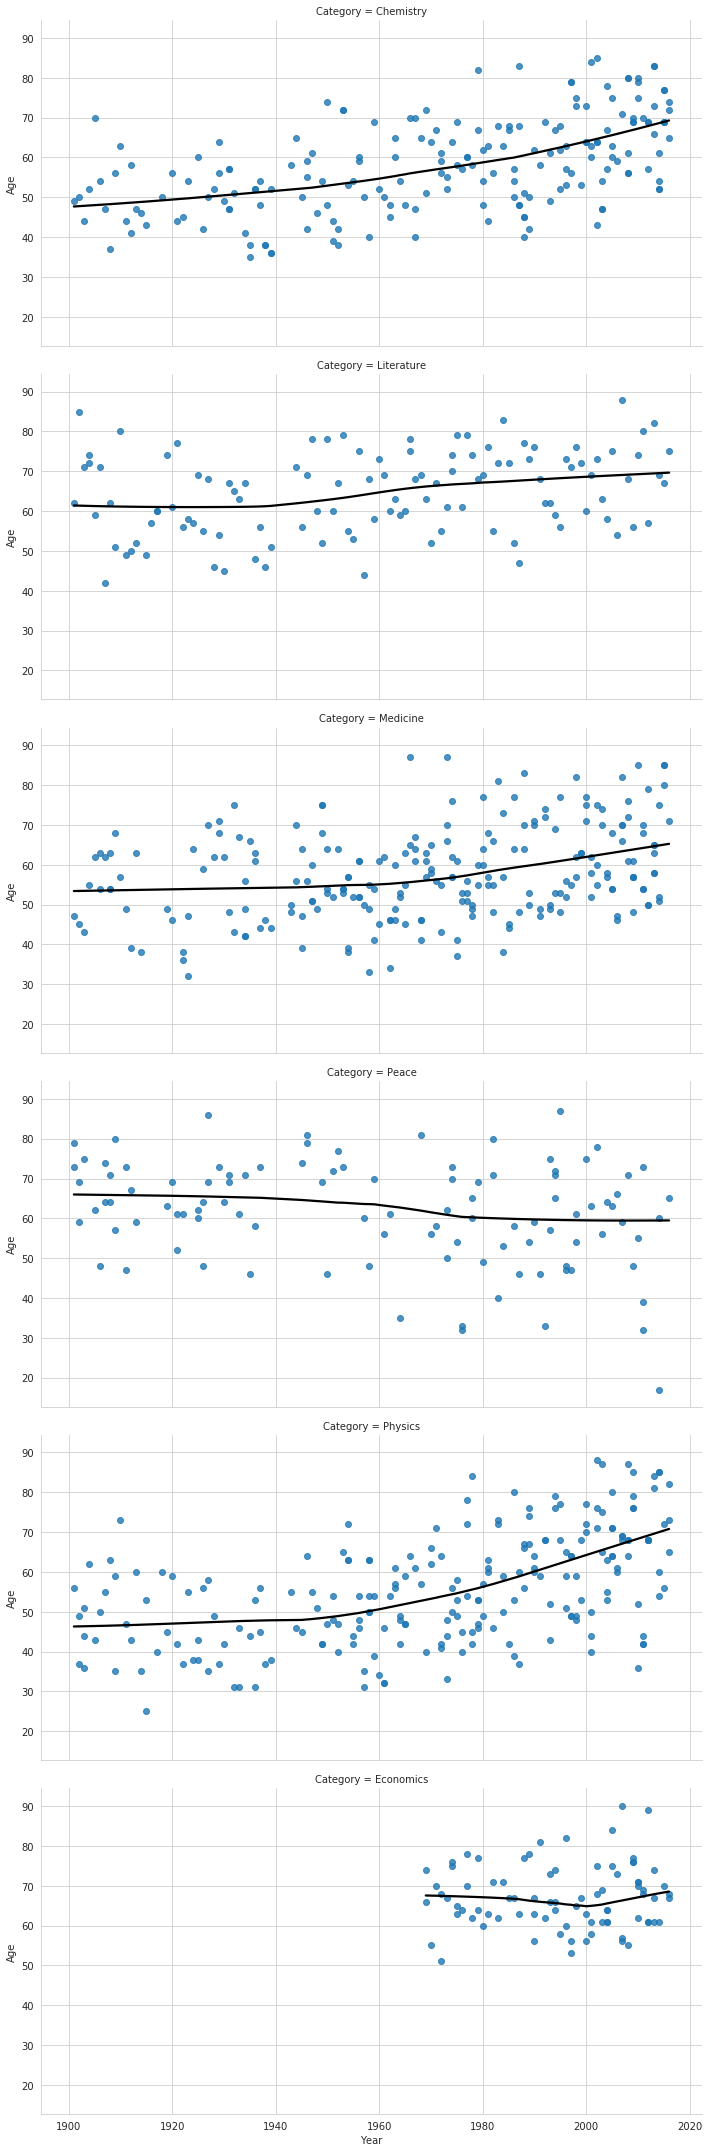

In [7]:
ax = sns.lmplot(x = 'Year', y = 'Age', data = nobel, row = 'Category', lowess = True, aspect = 2, line_kws = {'color' : 'black'})

We see that Chemistry, Literature, Medicine and Physics all follow the same pattern - the winners have gotten older over time. This trend is the strongest in Physics, where laureates used to be less than 50 years of age and are now over 70 on average. Literature is the most stable. Economics is a new category, and Peace has followed the opposite pattern where winners have gotten younger with time, with an exceptionally young recent winner:

In [8]:
print(nobel.nsmallest(1, 'Age')['Full Name'])

940    Malala Yousafzai
Name: Full Name, dtype: object


There is a lot more to be learned from this very rich database of Nobel laureates. This only serves as a short primer into the very major trends of this prestigious award.